<a href="https://colab.research.google.com/github/aryashivakumar/dataScience/blob/main/Unit2/AryaKumarUnit2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is Bitcoin Projected to go Up or Down on a given day

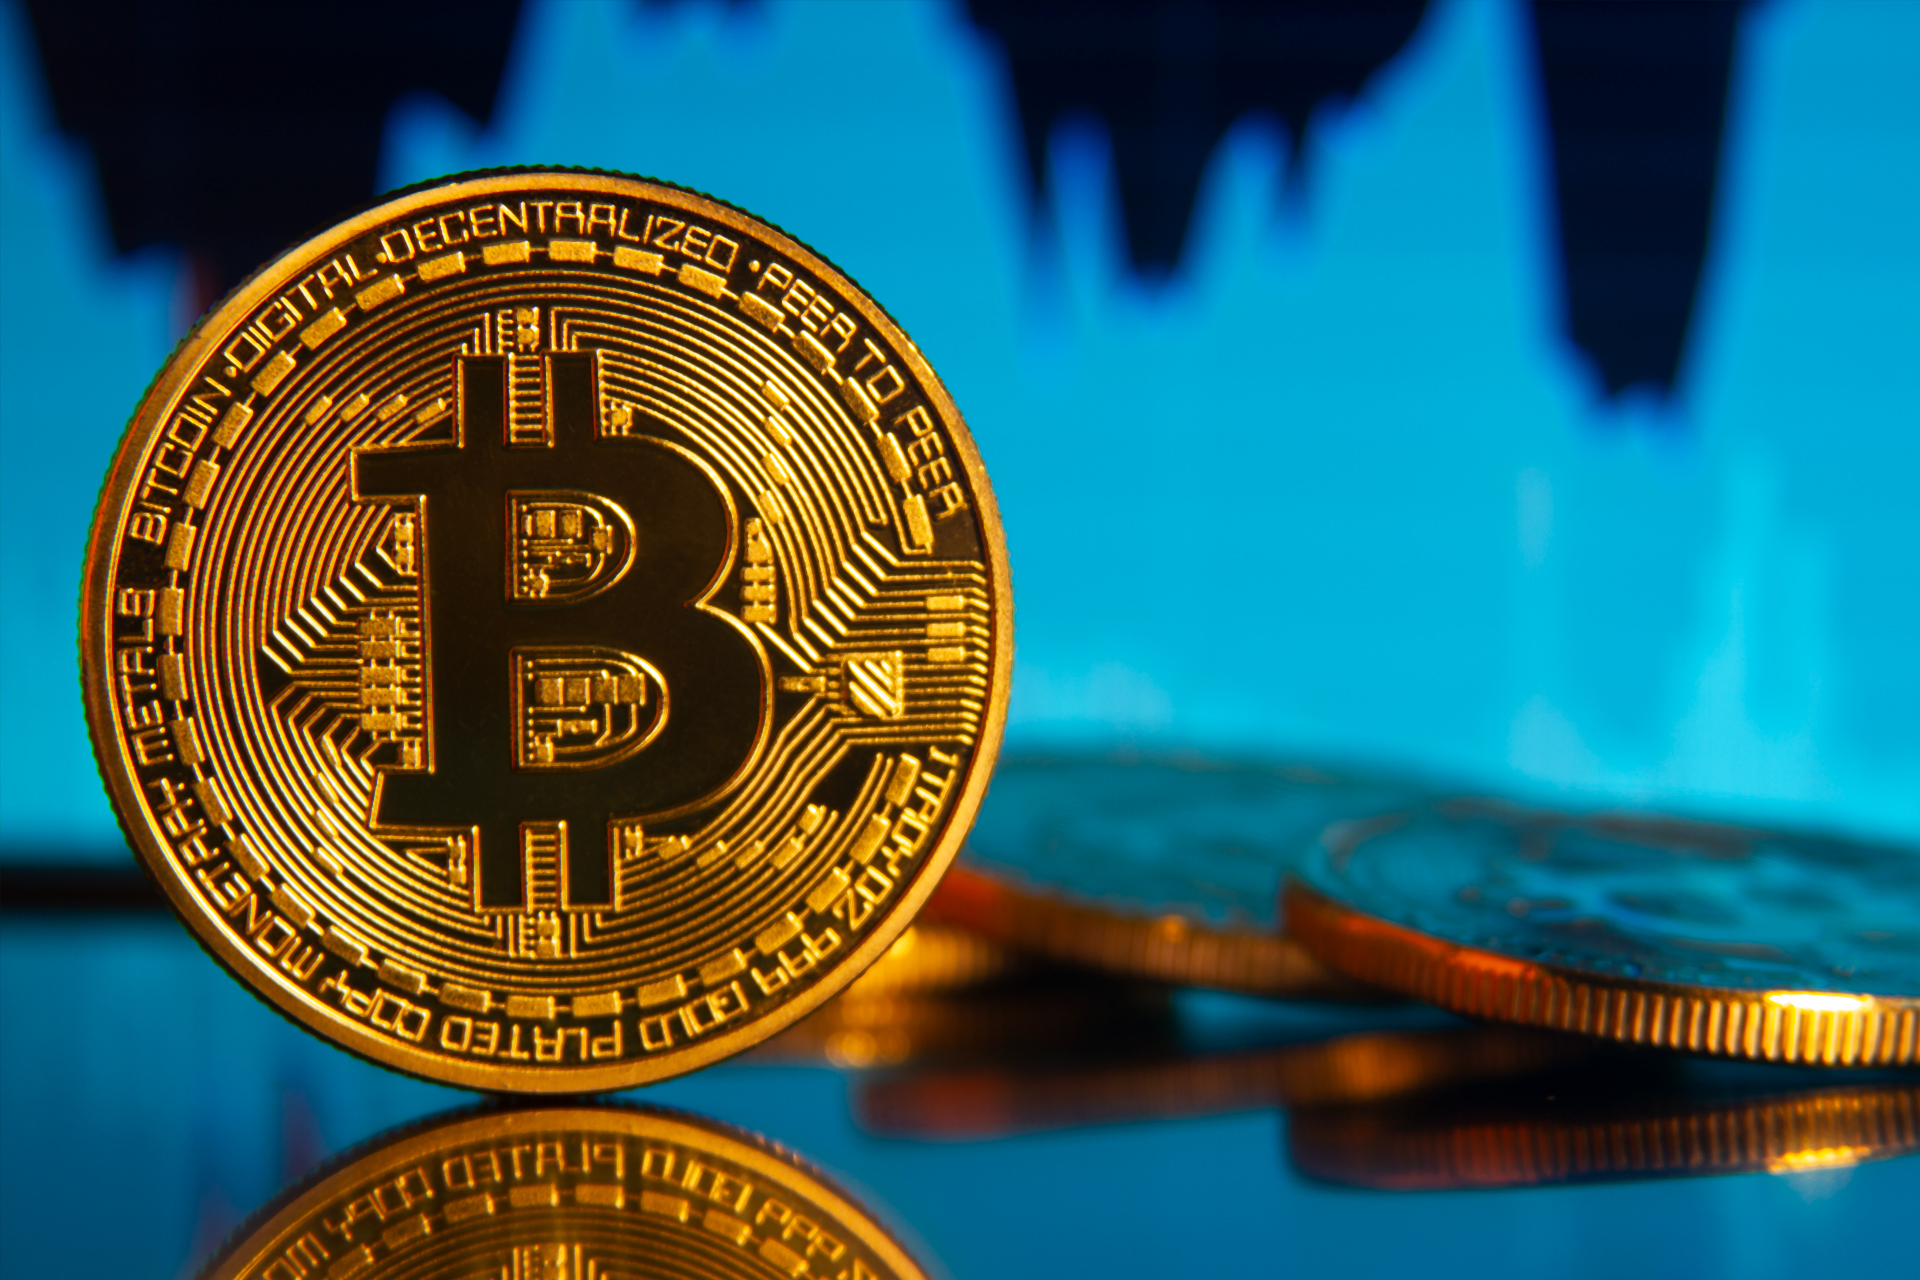



In the new age of decentralized finance, it is more important than ever to take a thourough look of a investments returns prior to purchasing in order to diversify ones portfolio. Intrigued by a example called Bitcoin, I decided to utilize daily market data from the past 5 years in order to determine if Bitcoin has performed either positively (defined by either an up or zero percentage change day) or negatively (defined by a negative percentage change day).

Bitcoin (abbreviation: BTC; sign: ₿) is the first decentralized cryptocurrency. Based on a free-market ideology, bitcoin was invented in 2008 when an unknown entity published a white paper under the pseudonym of Satoshi Nakamoto.
Bitcoin works through the collaboration of computers, each of which acts as a node in the peer-to-peer bitcoin network. Each node maintains an independent copy of a public distributed ledger of transactions, called a blockchain, without central oversight. (Wikipedia)

In [1]:
import numpy as np
import pandas as pd
!pip install preliz
import preliz as pz
import pymc as pm
import arviz as az

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 9.0 MB/s eta 0:00:00


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/aryashivakumar/dataScience/refs/heads/main/Unit2/DailyBitcoinDataPast5Years%20-%20Bitcoin%20Historical%20Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Percent Change
0,09/08/2025,"112,385.80","111,140.90","112,896.90","110,630.50",39.40K,1.11
1,09/07/2025,"111,150.10","110,194.40","111,594.10","110,185.60",23.81K,0.87
2,09/06/2025,"110,194.40","110,660.10","111,313.40","110,010.50",21.14K,-0.41
3,09/05/2025,"110,652.20","110,727.90","113,315.60","110,234.60",63.56K,-0.05
4,09/04/2025,"110,712.70","111,716.50","112,189.10","109,344.80",43.30K,-0.90
...,...,...,...,...,...,...,...
1822,09/12/2020,"10,441.90","10,390.20","10,476.80","10,275.90",48.49K,0.50
1823,09/11/2020,"10,390.20","10,339.80","10,398.80","10,212.60",62.28K,0.49
1824,09/10/2020,"10,339.70","10,224.30","10,480.30","10,219.20",88.01K,1.13
1825,09/09/2020,"10,224.60","10,126.80","10,343.30","9,984.60",71.37K,0.97


**Calculation of Up or Down days, Up is inclusive of positive or no change**

In [10]:
column_name = "Percent Change"

positive_count = (df[column_name] > 0).sum()
negative_count = (df[column_name] < 0).sum()
zero_count = (df[column_name] == 0).sum()

print(positive_count)
print(negative_count)
print(zero_count)

926
897
4


### **The Prior**

My preconceived notion about bitcoin due is that it would have greater higher days in comparison to lower days due to its start in spread of usage. I have created an weak informative prior with a slight left skew, as I believe it has an more than 50% chance of going up or down by my definition. To capture this belief, I am using a Beta dsitrbution with parameters α = 6 and β = 4

<Axes: >

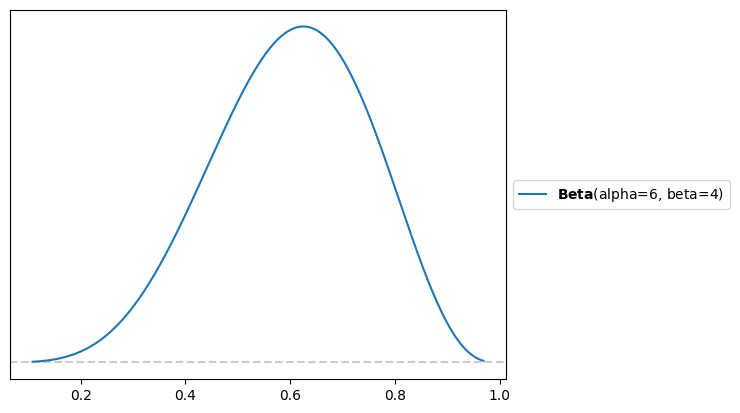

In [11]:
pz.Beta(6,4).plot_pdf()

### **Likelihood**

The graph below shows a binom distribution for my likelihood, the probability of Bitcoin going up is 930 out of the 1827 days of data utilized in the dataset. Following this I will use my prior and likelihood to create a posterior:

<Axes: >

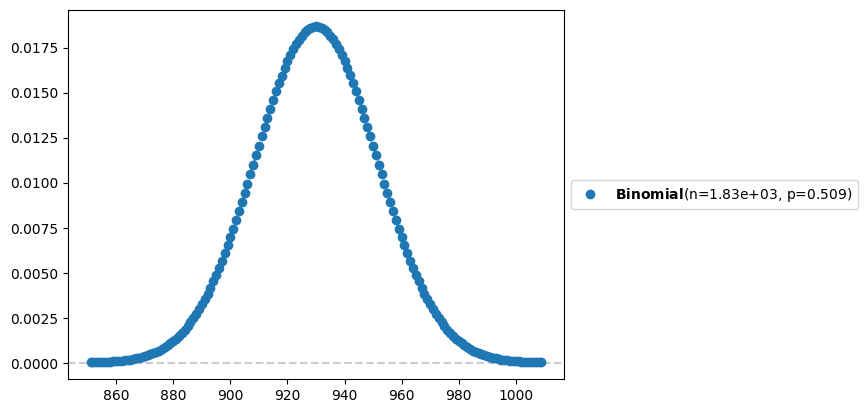

In [12]:
pz.Binomial(n = 1827, p = 930/1827).plot_pdf()

In [ ]:
data = np.repeat([1,0], repeats = [positive_count + zero_count, negative_count])
with pm.Model() as bitcoin_model:
  θ = pm.Beta('θ' , alpha = 6 , beta = 4)
  y = pm.Bernoulli('y', p = θ, observed = data)
  idata_BC = pm.sample()

## **Conclusion**

The below distribution showcases Bitcoins expected stock price increase, and shows we have a 94% chance that the true probability of Bitcoins increase is between the left and right values showcased. My prior before was uninformative. The model below showcase a moderate amount of uncertainty, additionally the mean of 0.51 showcases that the percentage change being either up or down was very close to 50%, therefore Bitcoin, as modeled on a day to day basis may not be the best choice for a investment.

<Axes: title={'center': 'θ'}>

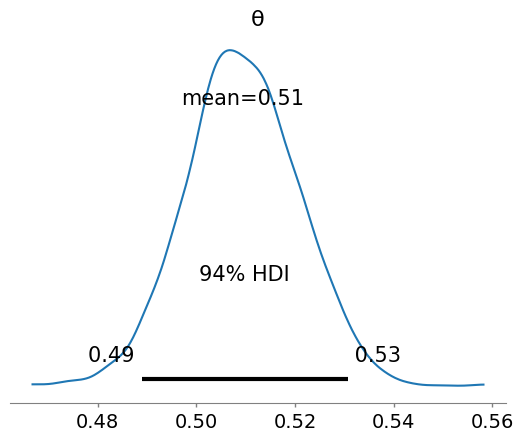

In [16]:
az.plot_posterior(idata_BC)